# ZKM SOUNDSCAPE ANALYSIS

1) calculate ENERGY LEVELS


CALCULATE ENERGY LEVELS

FFT - SUM BINS - FAST

FFT - SUM BINS - SLOW

NORMALISE MAGNITUDE

CALCULATE dB TO ZERO

SHOW THE NUMBERS AS COLORS IN THE OCTAVES (SPECTRUM OCTAVE TO OCTAVE) PRESENCE OF HARMONICS

SUM is THE OVERALL ENERGY

original file

P1.wav stereo 44100 24 

mix and split 16

mono left right 16 bit

filterA

return object [Amono, Aleft, Aright]

P1 = {

filtered_splits =
[Amono, Aleft, Aright]

extractions = {
//first iteration
property .F = F_Amono.wav,
property .B = B_Amono.wav, 
//second iteration
property .FF = FF_Amono.wav,
property .FB = FB_Amono.wav,
property .BF = BF_Amono.wav,
property .BB = BB_Amono.wav
}

Run CALC_ENV_FILE

on full length plotting mono, left, right (k, b, r)

LA10 LA50 LA90 

on F = give number
on B = give number

on FF, FB, BF, BB = give number dB

compare relationships (diff in profiles (curves))



In [1]:
from librosa import load
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import scipy as scipy
from scipy.signal import lfilter
import IPython.display as ipd
from math import pi  
from math import tan 
from math import pow 

In [2]:
# FFT - SUM BINS - FAST
# Takes audio signal filtered in dBA

def  magnitude(the_signal):

# the signal is a tuple with fs as second parameter
# call librosa    
    the_complex_spectrum=librosa.core.stft(the_signal, n_fft=NFFT, hop_length=None, win_length=None, window='hann')
    the_magnitude =np.abs(the_complex_spectrum)
    print(len(the_signal))
    
    return(the_magnitude)

In [3]:
def normalize(the_magnitude):
    
    N=NFFT
    the_norm_mag = the_magnitude/N*2

    return(the_norm_mag)

In [4]:
# def store_in_dB(the_norm_mag):
    
#     the_dB_mag_spectrum = librosa.amplitude_to_db(the_norm_mag, ref=0),sr=44100, y_axis='log',x_axis='frames'
# #     librosa.amplitude_to_db(norm_Mag_ref_slice_rect, ref=0),sr=44100, y_axis='log',x_axis='frames')

#     return(the_dB_mag_spectrum)

In [5]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def sum_bin_energy(the_norm_mag):
    
    mag_sum=[]
    dB_sum=[]
    jlogf =[]
#     sample_frames=[]
    
    numOfFrames = the_norm_mag.shape[1]
    numOfBins = the_norm_mag.shape[0]
    
    print(numOfFrames, numOfBins)
#     print(numOfFrames, numOfBins)

    hopSize = NFFT/4
    print(hopSize)
    
    samples = (numOfFrames) * hopSize
    
    print(samples)

    sample_frames = np.arange(0,samples,hopSize)
#     sample_frames =np.linspace(0,samples,numOfFrames)

    print(sample_frames[numOfFrames-1])
#     print(len(sample_frames))

    for frame_column in range(0, len(sample_frames)):
                   
    #     take one entire column of N bins
                   
        g = the_norm_mag[: , frame_column]
                   
    #     sum the amplitude in the bins and append it to the column array
                        
        mag_sum.append(np.sum(g))   
                        
    #     h.append(np.mean(g))
    #     now take one column, convert all of it to dB
#                               and store it in j (temporary)

        j = librosa.amplitude_to_db(g, ref=0) 

    #     for every element in the column
    # reset jlog 
               
#         empty the array
                        
        jlogf = []

        for k in j:

    #         store in array the converted values
                        
            jlogf.append(10**(k/10))
                        
    # then sum in dB way the values and store the sum in the dB_sum array
                        
#         sumForWindow = 10*np.log10(sum(jlogf))                         
#         dB_sum.append(sumForWindow)
                              
        dB_sum.append(10*np.log10(sum(jlogf)) +6.4) 
        

 # convert the amplitude sum to dB
#     dB_mag_sum = librosa.amplitude_to_db(mag_sum, ref=0)
#     dB_mag_sum = librosa.amplitude_to_db(mag_sum, ref=0)-20.6
#     dB_mag_sum = librosa.amplitude_to_db(mag_sum, ref=)-27.8
#     arrays = [dB_sum, dB_mag_sum]
# return arrays, sample_frames

    print(len(dB_sum))
    print(len(sample_frames))

    return dB_sum, sample_frames


    

In [21]:
import seaborn as sns
from numpy import sin, cos, pi

from cycler import cycler

def plot_spectrogram(the_file, durata, P, integ):
    
    plt.figure(figsize=(20, 5))
    fig, ax = plt.subplots(figsize=(15, 5))

    fft_size = NFFT
    sr=44100

    ax = plt.gca()

    the_transform_mag = np.abs(librosa.core.stft(the_file, n_fft=NFFT, hop_length=None, win_length=None, window='hann'))
    librosa.display.specshow(librosa.amplitude_to_db(the_transform_mag,ref=-90),sr=44100, y_axis='log',x_axis='frames')
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    
    def format_func(value, tick_number):
        
        return int(((value +1) * frame)/fs)

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

    plt.xlabel('Seconds')

    plt.title(P  +'_'+ integ)
    fig.tight_layout()
    plt.savefig(P+'_' + integ +'_'+ str(durata) +'.eps', dpi=150)

    plt.show()

In [22]:
def plotlines(dB_sum, sample_frames, channel, durata, partic, integ):

#     dB_sum = arrays[0]
#     dB_mag_sum = arrays[1]
    
    print(channel)
    if channel == 'mono':
        mk_col = 'k'
        mk_col2 = '#17becf'
    elif channel == 'left':
        mk_col = 'b'
        mk_col2 = '#aec7e8'
    elif channel == 'righ':
        mk_col = 'r'
        mk_col2 = '#ff9896'

    
    plt.figure(figsize=(15, 10))

    fig, ax = plt.subplots(figsize=(15, 10))
    plt.annotate(str(round(np.percentile(dB_sum, 90),2)), (0,np.percentile(dB_sum, 90)))
    plt.annotate(str(round(np.percentile(dB_sum, 50),2)), (0,np.percentile(dB_sum, 50)))
    plt.annotate(str(round(np.percentile(dB_sum, 10),2)), (0,np.percentile(dB_sum, 10)))
    plt.annotate(str(round(np.mean(dB_sum),2)), (0,np.mean(dB_sum)))
    
    plt.axhline(y=np.mean(dB_sum), linestyle= ':',color=mk_col, label='AVG' )
    plt.axhline(y=np.percentile(dB_sum, 90), linestyle= ':',color=mk_col, label='LA10' )
    plt.axhline(y=np.percentile(dB_sum, 10), linestyle= '--',color=mk_col, label='LA90')
    plt.axhline(y=np.percentile(dB_sum, 50), linestyle= '-',color=mk_col, label='LA50')
    plt.xticks(sample_frames, fontsize=14)

    plt.plot(sample_frames, dB_sum, color=mk_col, linewidth= .5, label=' LA')   
    
    plt.legend()
       
    ax.xaxis.set_major_locator(plt.MultipleLocator(44100))
    
    def format_func(value, tick_number):
        
        return int(value / 44100)

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

    plt.title(partic + '_' + channel +'_LA ' + integ)
    plt.xlabel('Seconds')

    plt.ylabel('LA_'+ integ )
    
    plt.grid(True,which='major', axis='both')
    
    plt.ylim((35, 80))
    
    
    fig.tight_layout()
    plt.savefig(partic + "_"+ integ+ '_'+ str(durata) +'_'+ channel +'.eps', dpi=150)

    plt.show()
    

In [23]:
def plotlines1(mono_arrays, durata, partic, integ, scale):

    dB_sum_mono = mono_arrays[0]
#     dB_sum_left = left_arrays[0]
#     dB_sum_righ = right_arrays[0]
    
    sample_frames=mono_arrays[1]

    mk_col = 'k'
    mk_col2 = 'r'
    
    windows = []
    hop = NFFT/4
#     la50=[]
    
#     if (durata > hop):
        
#         windows =  np.arange(0, int(durata/(NFFT)), 1)
        
#         print(windows)
#         time = windows * NFFT / fs
#         print(time)
        
#         frames = np.arange(0, (len(sample_frames)*hop)-NFFT, NFFT)
        
#         print(sample_frames/NFFT)
#         print(sample_frames/44100)
#         print(frames)
        
#         for n in windows:
            
#             la50.append(np.percentile(dB_sum_mono[n*4:(n*4)+4], 50))
# #             la50.append(np.percentile(dB_sum_mono[n*4:(n*4)+16], 50))
    
#         print(la50)
        
    plt.figure(figsize=(15, 10))

    fig, ax = plt.subplots(figsize=(15, 5))
#     fig, ax = plt.subplots(figsize=(durata*2/44100/60, 5))
    
    la10=str(round(np.percentile(dB_sum_mono, 90),1))
    la50=str(round(np.percentile(dB_sum_mono, 50),1))
    la90=str(round(np.percentile(dB_sum_mono, 10),1))
    
#     plt.annotate('LA10 = ' + la10, (0,np.percentile(dB_sum_mono, 90)))
#     plt.annotate('LA50 = ' + la50, (0,np.percentile(dB_sum_mono, 50)))
#     plt.annotate('LA90 = ' + la90, (0,np.percentile(dB_sum_mono, 10)))
    plt.axhline(y=np.percentile(dB_sum_mono, 90),  linewidth= .5, linestyle= ':',color=mk_col2, label='LA10 = ' +  la10)
    plt.axhline(y=np.percentile(dB_sum_mono, 50), linewidth= .5,linestyle= '-',color=mk_col2, label='LA50 = ' +  la50)
    plt.axhline(y=np.percentile(dB_sum_mono, 10), linewidth= .5,linestyle= '-.',color=mk_col2, label='LA90 = ' +  la90)

    plt.xticks(sample_frames, fontsize=14)
    
#     if (durata > hop):
#         plt.plot(frames, la50, color='r', linestyle= '-.', linewidth= .5, label=' LA50 var') 
    
    plt.plot(sample_frames, dB_sum_mono, color=mk_col, linestyle= '--', linewidth= .8, label=' LAEq') 
    plt.legend()
    
    if scale == 's':
    
#     seconds
        ax.xaxis.set_major_locator(plt.MultipleLocator(44100 *5))
        def format_func(value, tick_number):

            return int(value / 44100)

        ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
        plt.xlabel('Seconds')
 #     min  
    elif scale == 'm':
        ax.xaxis.set_major_locator(plt.MultipleLocator(44100 *60))
        def format_func(value, tick_number):

            return int(value / (44100*60))

        ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
        plt.xlabel('Minutes')

    
    
    
    plt.title(partic + '_uni_' +'_LA ' + integ)
    
#     plt.xlabel('Samples')
    plt.ylabel('LA_'+ integ )
    
    plt.grid(True,which='major', axis='both')
    
    plt.xlim(0,durata)
    plt.ylim((35, 80))
#     plt.ylim((70, 90))
    
    
    fig.tight_layout()
    plt.savefig(partic + "_LAEQ_"+ integ+ '_'+ str(durata) +'.eps', dpi=150)


    plt.show()
    


P01_A-left_back_77_A.wav
P01_A-mono_fore_77_A.wav
P01_A-mono_back_fore_77_A.wav
P01_A-mono_back_back_77_A.wav
P01_A-mono_back_77_A.wav
P01_A-left_test_fore_77_A.wav
P01_A-left_test_back_77_A.wav
P01_A-left_fore_77_A.wav
P01_A-left_back_fore_77_A.wav
P01_A-left_back_back_77_A.wav

In [24]:
def plotlines3(mono_arrays, left_arrays, right_arrays, durata, partic, integ):

    dB_sum_mono = mono_arrays[0]
    dB_sum_left = left_arrays[0]
    dB_sum_righ = right_arrays[0]
    
    sample_frames=mono_arrays[1]

    mk_col = 'k'
    mk_col2 = 'g'

    
    plt.figure(figsize=(15, 10))

    fig, ax = plt.subplots(figsize=(15, 5))
    
    plt.annotate(str(round(np.percentile(dB_sum_mono, 90),1)), (0,np.percentile(dB_sum_mono, 90)))
    plt.annotate(str(round(np.percentile(dB_sum_mono, 50),1)), (0,np.percentile(dB_sum_mono, 50)))
    plt.annotate(str(round(np.percentile(dB_sum_mono, 10),1)), (0,np.percentile(dB_sum_mono, 10)))

    plt.axhline(y=np.percentile(dB_sum_mono, 90),  linewidth= .5, linestyle= ':',color=mk_col, label='LA10' )
    plt.axhline(y=np.percentile(dB_sum_mono, 10), linewidth= .5,linestyle= '--',color=mk_col, label='LA90')
    plt.axhline(y=np.percentile(dB_sum_mono, 50), linewidth= .5,linestyle= '-',color=mk_col, label='LA50')
    

    plt.xticks(sample_frames, fontsize=14)

    plt.plot(sample_frames, dB_sum_mono, color=mk_col, linestyle= '-.', linewidth= .5, label=' LA mono') 
    plt.plot(sample_frames, dB_sum_left, color='b', linewidth= .9, label=' LA left') 
    plt.plot(sample_frames, dB_sum_righ, color='r', linewidth= .9, label=' LA right')
    
    plt.legend()
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(44100 *5))
    
    def format_func(value, tick_number):
        
        return int(value / 44100)

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    plt.title(partic + '_tri_' +'_LA ' + integ)
    plt.xlabel('Seconds')
    plt.ylabel('LA_'+ integ )   
    plt.grid(True,which='major', axis='both')
    plt.xlim(0,durata)
    plt.ylim((35, 80))
  
    fig.tight_layout()
    plt.savefig(partic + "_tri_"+ integ+ '_'+ str(durata) +'.eps', dpi=150)


    plt.show()

In [31]:
NFFT=0
integ= 'slow'
    
    
if integ == 'slow':
    NFFT= 65436
elif integ == 'fast':
    NFFT= 8192
    

# /Users/amilo/Desktop/karl/P01/yourfolder/filt/P01_A-left_back_77_A.wav
# P01_A-mono_fore_77_A.wav
# P01_A-mono_back_fore_77_A.wav

fileloc =   '/Users/amilo/Desktop/karl/P01/yourfolder/filt/P01_A-mono_back_fore_77_A.wav'
filebase = fileloc[:-10]
print(filebase)

mono, fs = load(fileloc, sr=44100, mono=True)
# left, fs = load(filebase+'left_A.wav', sr=44100, mono=True)
# righ, fs = load(filebase+'righ_A.wav', sr=44100, mono=True)

durata = len(mono)-1
# durata = fs*9*60

partic = 'P01_A-mono_back_fore_77_A.wav'

print(partic)

array2= sum_bin_energy(normalize(magnitude(mono[0:durata])))

# plotlines1(array2, durata, partic, integ, 'm')


/Users/amilo/Desktop/karl/P01/yourfolder/filt/P01_A-mono_back_for
P01_A-mono_back_fore_77_A.wav
1648387
101 32719
16359.0
1652259.0
1635900.0
101
101


<Figure size 1440x360 with 0 Axes>

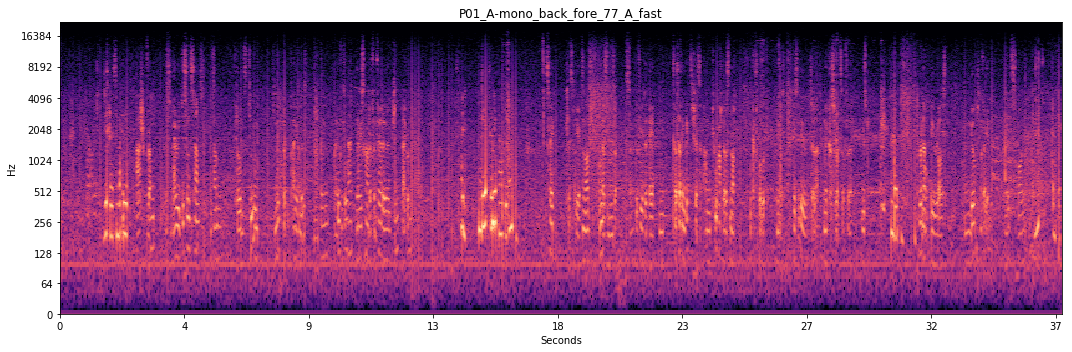

In [32]:
NFFT=0
integ= 'fast'

P='P01_A-mono_back_fore_77_A'
   
if integ == 'slow':
    NFFT= 65436
elif integ == 'fast':
    NFFT= 8192

frame = int(NFFT/4)

fs = 44100

durata = len(mono)-1
# durata = fs*60*9

plot_spectrogram(mono[0:durata], durata, P, integ)

<Figure size 1080x720 with 0 Axes>

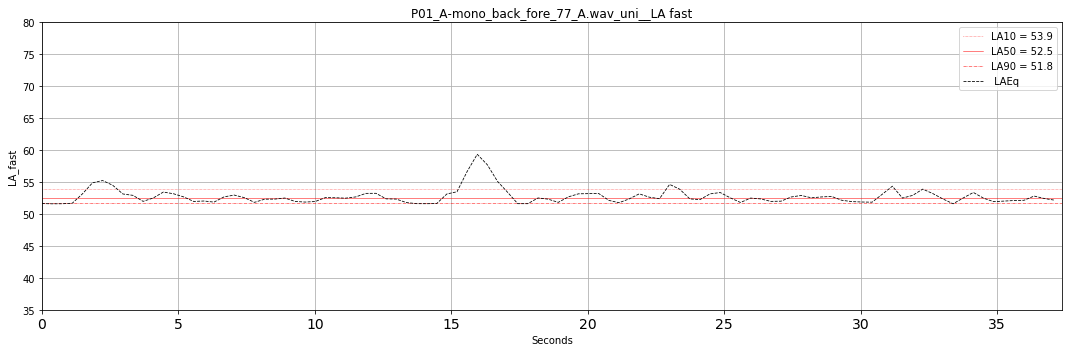

In [33]:
plotlines1(array2, durata, partic, integ, 's')

In [44]:
NFFT=0
integ= 'slow'
    
    
if integ == 'slow':
    NFFT= 65436
elif integ == 'fast':
    NFFT= 8192

fileloc =   '/Users/amilo/Desktop/karl/participants/251119_P1/yourfolder/P01_A-mono_A.wav'
filebase = fileloc[:-10]
print(filebase)

mono, fs = load(fileloc, sr=44100, mono=True)
# left, fs = load(filebase+'left_A.wav', sr=44100, mono=True)
# righ, fs = load(filebase+'righ_A.wav', sr=44100, mono=True)

durata = len(mono)-1
# durata = fs*9*60

partic = 'P01_A'

print(partic)

array1= sum_bin_energy(normalize(magnitude(mono[0:durata])))

# plotlines1(array1, durata, partic, integ, 'm')


/Users/amilo/Desktop/karl/participants/251119_P1/yourfolder/P01_A-
P01_A
6341163
388 32719
16359.0
6347292.0
6330933.0
388
388


<Figure size 1080x720 with 0 Axes>

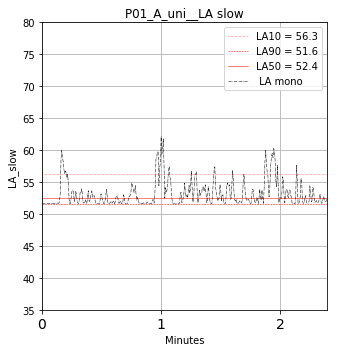

In [45]:
plotlines1(array1, durata, partic, integ, 'm')

In [50]:
NFFT=0
integ= 'slow' 
    
if integ == 'slow':
    NFFT= 65436
elif integ == 'fast':
    NFFT= 8192

fileloc =   '/Users/amilo/Desktop/karl/participants/251119_P1/yourfolder/P01_C-mono_A.wav'
filebase = fileloc[:-10]
print(filebase)

mono, fs = load(fileloc, sr=44100, mono=True)
left, fs = load(filebase+'left_A.wav', sr=44100, mono=True)
righ, fs = load(filebase+'righ_A.wav', sr=44100, mono=True)

durata = len(mono)-1
# durata = fs*9*60

partic = 'P01_C'

print(partic)

array3= sum_bin_energy(normalize(magnitude(mono[0:durata])))
array4= sum_bin_energy(normalize(magnitude(left[0:durata])))
array5= sum_bin_energy(normalize(magnitude(righ[0:durata])))

# plotlines1(array1, durata, partic, integ, 'm')


/Users/amilo/Desktop/karl/participants/251119_P1/yourfolder/P01_C-
P01_C
14214962
869 32719
16359.0
14215971.0
14199612.0
869
869
14214962
869 32719
16359.0
14215971.0
14199612.0
869
869
14214962
869 32719
16359.0
14215971.0
14199612.0
869
869


<Figure size 1080x720 with 0 Axes>

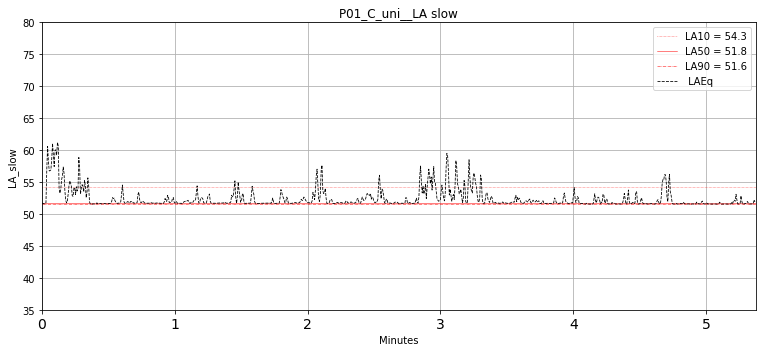

In [49]:
plotlines1(array3, durata, partic, integ, 'm')


<Figure size 1080x720 with 0 Axes>

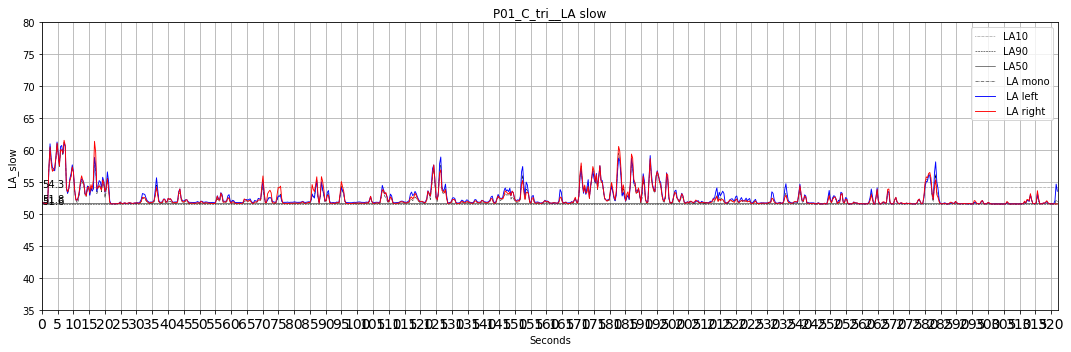

In [52]:
plotlines3(array3, array4, array5,  durata, partic, integ)

In [53]:
NFFT=0
integ= 'slow' 
    
if integ == 'slow':
    NFFT= 65436
elif integ == 'fast':
    NFFT= 8192

fileloc =   '/Users/amilo/Desktop/karl/participants/251119_P1/yourfolder/P01_D-mono_A.wav'
filebase = fileloc[:-10]
print(filebase)

mono, fs = load(fileloc, sr=44100, mono=True)
# left, fs = load(filebase+'left_A.wav', sr=44100, mono=True)
# righ, fs = load(filebase+'righ_A.wav', sr=44100, mono=True)

durata = len(mono)-1
# durata = fs*9*60

partic = 'P01_D'

print(partic)

array6= sum_bin_energy(normalize(magnitude(mono[0:durata])))
# array4= sum_bin_energy(normalize(magnitude(left[0:durata])))
# array5= sum_bin_energy(normalize(magnitude(righ[0:durata])))


/Users/amilo/Desktop/karl/participants/251119_P1/yourfolder/P01_D-
P01_D
12056503
737 32719
16359.0
12056583.0
12040224.0
737
737


<Figure size 1080x720 with 0 Axes>

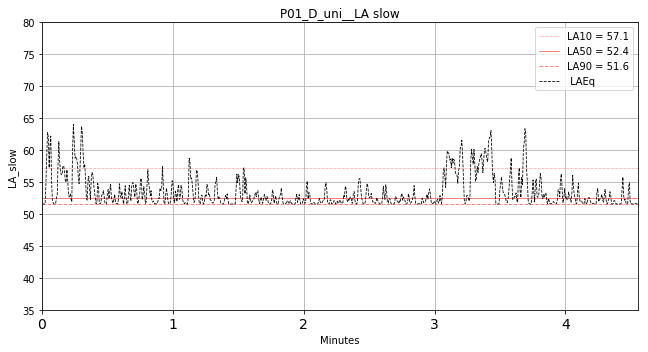

In [54]:
plotlines1(array6, durata, partic, integ, 'm')

271115B_P4-mono_A.wav
271115A_P4-mono_A.wav
271109B_P3-mono_A.wav
271109A_P3-mono_A.wav
261117_P2-mono_A.wav
261113N2-mono_A.wav
261113N-mono_A.wav
261113B_P5-mono_A.wav
261113A_P6-mono_A.wav
251119_P1-mono_A.wav

<Figure size 1080x720 with 0 Axes>

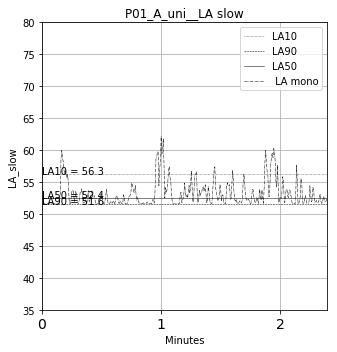

In [36]:
plotlines1(array1, durata, partic, integ, 'm')

<Figure size 1080x720 with 0 Axes>

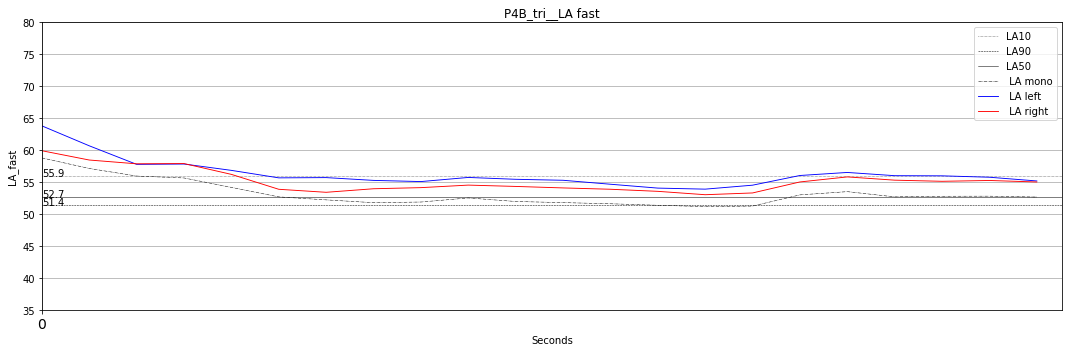

In [44]:
plotlines3(array1, array2, array3,  durata, partic, integ)

<Figure size 1440x360 with 0 Axes>

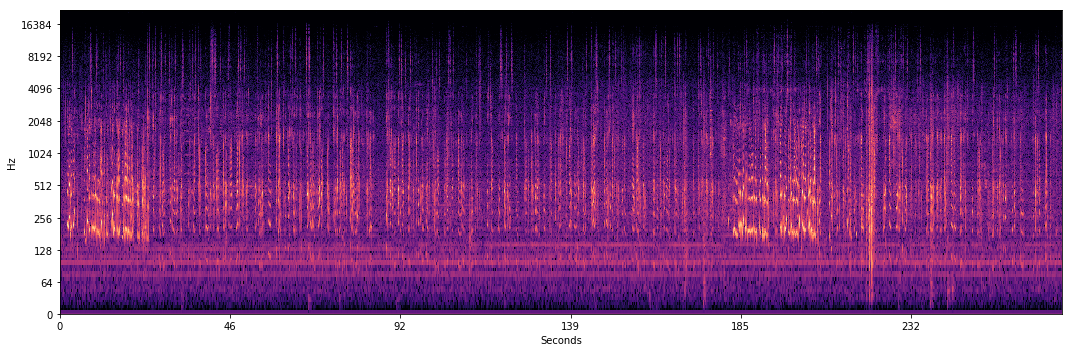

In [57]:
NFFT=0
integ= 'fast'
P='P1_D_A'


    
if integ == 'slow':
    NFFT= 65436
elif integ == 'fast':
    NFFT= 8192

frame = int(NFFT/4)

fs = 44100

durata = len(mono)-1
# durata = fs*60*9

# print(conv_sec)


plot_spectrogram(mono[0:durata], durata, P, integ)

88199
44 4097
2048.0
90112.0
88064.0
left


<Figure size 1080x720 with 0 Axes>

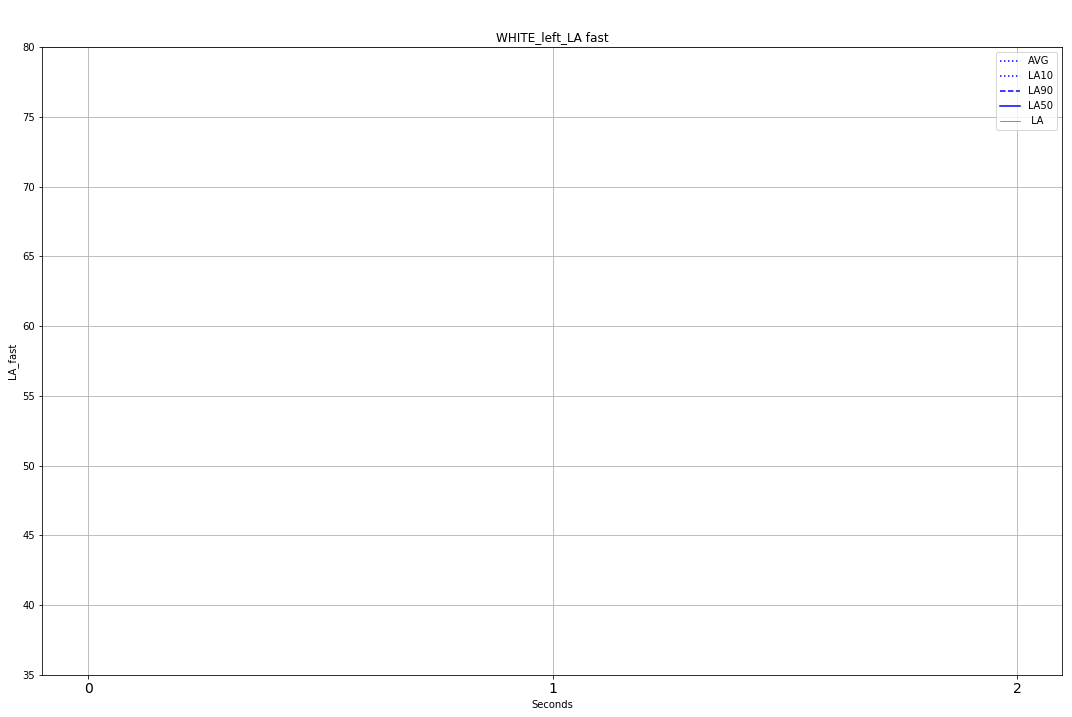

In [184]:
# CALCULATE ENERGY LEVELS

# THIS IS THE MAIN
# USAGE: assign file location to parameter
#     feed parameter to function
#     return table with results

# needs argument: the file


def CALC_EN_LEV(the_file, channel, partic, durata, integ):
    
#     plot_spectrogram(the_file)
    array1= sum_bin_energy(normalize(magnitude(the_file)))
#     plotlines(array1[0],array1[1],  channel, durata, partic, integ)
    plotlines(array1[0],array1[1],  channel, durata, partic, integ)

  



# this needs to be already filtered in dBA (see MATLAB code)
# mono_file, fs = load('/Users/amilo/Desktop/karl/calibration/MONO_85_dBA_SLOW_left.wav', sr=44100, mono=True)



mono_file_1, fs = load('/Users/amilo/Desktop/Francesco/MONO_85_dBA_SLOW.wav', sr=44100, mono=True)

mono_file_2, fs = load('/Users/amilo/Desktop/Francesco/MONO_85_dBA_SLOW_left_A.wav', sr=44100, mono=True)
# mono_file_speech, fs = load('/Users/amilo/Desktop/karl/testP2_sp.wav', sr=44100, mono=True)


NFFT=0
integ= 'fast'
    
    
if integ == 'slow':
    NFFT= 65436
elif integ == 'fast':
    NFFT= 8192

durata = fs*2
# CALC_EN_LEV(mono_file_1[1:durata], 'righ', 'P4', durata, integ)
# CALC_EN_LEV(mono_file_2[1:durata], 'left', 'P4', durata, integ)
# CALC_EN_LEV(mono_file_3[1:durata], 'mono', 'P4', durata, integ)

# durata = len(mono_file_3)

# CALC_EN_LEV(mono[1:durata], 'mono', 'P3', durata, integ)

# CALC_EN_LEV_tri(mono[1:durata], 'mono', 'P3', durata, integ)

CALC_EN_LEV(mono_file_1[1:durata], 'left', 'WHITE', durata, integ)

# CALC_EN_LEV(mono_file_1, 'left', 'PINKNOISE', durata, integ)
# CALC_EN_LEV(mono_file_2, 'left', 'PINKNOISE', durata, integ)
# CALC_EN_LEV(mono_file_1, 'righ', 'P4', durata, integ)
# CALC_EN_LEV(mono_file_2, 'left', 'P4', durata, integ)
# CALC_EN_LEV(mono_file_3, 'mono', 'P4', durata, integ)
# print(CALC_EN_LEV(mono_file))

Divido il folder per partecipante
metto left righ mono_A.wav

channel = filename(start, end-6)
print(getValues(filename, channel))
plot dBsumArray

save 